In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics._plot import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils
import seaborn as sns
import statsmodels.api as sm

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [369]:
data = pd.read_csv("salaries_clean.csv")
data.head()

,salary_id,employer_name,location_name,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,"san francisco, ca",US,37.77,-122.41,systems engineer,Engineering,13.0,2.0,125000.0,5000.0,0.0
1,3,walmart,"bentonville, ar",US,36.36,-94.20,senior developer,Software,15.0,8.0,65000.0,NaN,5000.0
2,4,vertical knowledge,"cleveland, oh",US,41.47,-81.67,software engineer,Software,4.0,1.0,86000.0,5000.0,6000.0
3,14,casino,eastern oregon,US,38.00,-97.00,it technician,Other,5.0,1.5,40000.0,0.0,500.0
4,16,tetra tech,"madison, wi",US,43.10,-89.50,lead interviewer,Other,4.0,2.5,45000.0,0.0,1500.0


In [370]:
# Calculate the most frequent value of the 'experience years' column
mode_experience = data['employer_experience_years'].mode()[0]

# Impute missing values with the mode
data['employer_experience_years'].fillna(mode_experience, inplace=True)




# Calculate the most frequent value of the 'experience years' column
mode_experience = data['total_experience_years'].mode()[0]

# Impute missing values with the mode
data['total_experience_years'].fillna(mode_experience, inplace=True)

In [371]:
# Calculate the mean of the 'signing bonus' column
mean_experience = data['signing_bonus'].mean()

# Impute missing values with the mean
data['signing_bonus'].fillna(mean_experience, inplace=True)





# Calculate the mean of the 'signing bonus' column
mean_experience = data['annual_base_pay'].mean()

# Impute missing values with the mean
data['annual_base_pay'].fillna(mean_experience, inplace=True)



# Calculate the mean of the 'signing bonus' column
mean_experience = data['annual_bonus'].mean()

# Impute missing values with the mean
data['annual_bonus'].fillna(mean_experience, inplace=True)

data.to_csv('salaries_clean2.csv')

In [372]:
print(len(data))
print(data.isnull().sum())

792
salary_id                    0
employer_name                1
location_name                0
location_country             0
location_latitude            0
location_longitude           0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64


In [373]:
data.head(50)

,salary_id,employer_name,location_name,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,"san francisco, ca",US,37.77,-122.41,systems engineer,Engineering,13.0,2.0,125000.0,5000.000000,0.000000
1,3,walmart,"bentonville, ar",US,36.36,-94.20,senior developer,Software,15.0,8.0,65000.0,21800.483568,5000.000000
2,4,vertical knowledge,"cleveland, oh",US,41.47,-81.67,software engineer,Software,4.0,1.0,86000.0,5000.000000,6000.000000
3,14,casino,eastern oregon,US,38.00,-97.00,it technician,Other,5.0,1.5,40000.0,0.000000,500.000000
4,16,tetra tech,"madison, wi",US,43.10,-89.50,lead interviewer,Other,4.0,2.5,45000.0,0.000000,1500.000000
5,17,knewton,new york city,US,38.00,-97.00,senior software engineer,Software,8.0,2.0,135000.0,0.000000,0.000000
6,24,pensco trust company,"denver, co",US,39.82,-105.10,senior software engineer,Software,10.0,1.5,120000.0,0.000000,6000.000000
7,30,purdue,"west lafayette, in",US,40.44,-86.91,web developer,Web,2.0,1.5,60000.0,21800.483568,8066.263736
8,39,magento commerce,"charleston, sc",US,32.78,-79.99,member of technical staff,Other,19.0,1.0,131000.0,21800.483568,8066.263736
9,40,oracle,"bala cynwyd, pa",US,40.01,-75.22,student intern co-op,Other,0.0,0.0,24.0,0.000000,0.000000


In [374]:
unique_values_job_title = data['job_title'].unique()

# Print the unique values
print(unique_values_job_title)

['systems engineer' 'senior developer' 'software engineer' 'it technician'
 'lead interviewer' 'senior software engineer' 'web developer'
 'member of technical staff' 'student intern co-op' 'full stack developer'
 'developer' 'senior analyst' 'software developer' 'ios developer'
 'associate software engineer' 'steam turbine service engineer'
 'senior engineer' 'product development engineer' 'it programmer'
 'director of product' 'engineer' 'architect' 'teir two tech'
 'consultant, cto as needed' 'python engineer' 'site reliability engineer'
 'system administrator' 'software engineer 1' 'horny' 'phd student' 'sde'
 'web developer general it' 'consultant' 'programmer analyst iii'
 'm&a analyst' 'software engineer - level 2'
 'senior application developer' 'senior system engineer' 'ux designer ii'
 'principal/lead software engineer' 'computer hardware engineer'
 'software engineer 2' 'cto' 'fp&a analyst' 'intern'
 'application engineer' 'financial engineer' 'agent developer' 'lead'
 '3d g

In [375]:
numbered_dict_job_title = {}

for i, item in enumerate(unique_values_job_title):
    numbered_dict_job_title[i+1] = item

print(numbered_dict_job_title)


cleaned_data = data.replace(list(numbered_dict_job_title.values()),numbered_dict_job_title.keys())



{1: 'systems engineer', 2: 'senior developer', 3: 'software engineer', 4: 'it technician', 5: 'lead interviewer', 6: 'senior software engineer', 7: 'web developer', 8: 'member of technical staff', 9: 'student intern co-op', 10: 'full stack developer', 11: 'developer', 12: 'senior analyst', 13: 'software developer', 14: 'ios developer', 15: 'associate software engineer', 16: 'steam turbine service engineer', 17: 'senior engineer', 18: 'product development engineer', 19: 'it programmer', 20: 'director of product', 21: 'engineer', 22: 'architect', 23: 'teir two tech', 24: 'consultant, cto as needed', 25: 'python engineer', 26: 'site reliability engineer', 27: 'system administrator', 28: 'software engineer 1', 29: 'horny', 30: 'phd student', 31: 'sde', 32: 'web developer general it', 33: 'consultant', 34: 'programmer analyst iii', 35: 'm&a analyst', 36: 'software engineer - level 2', 37: 'senior application developer', 38: 'senior system engineer', 39: 'ux designer ii', 40: 'principal/lead

In [376]:
print(data)

     salary_id                           employer_name      location_name   
0            1                                  opower  san francisco, ca  \
1            3                                 walmart    bentonville, ar   
2            4                      vertical knowledge      cleveland, oh   
3           14                                  casino     eastern oregon   
4           16                              tetra tech        madison, wi   
..         ...                                     ...                ...   
787       3276                      homenet automotive          exton, pa   
788       3278                                 comcast   philadelphia, pa   
789       3287  mainz brady group - contractor at nike      beaverton, or   
790       3289                    sparkfun electronics        boulder, co   
791       3294                             of maryland   college park, md   

    location_country  location_latitude  location_longitude   
0           

In [377]:
unique_values_job_category = data['job_title_category'].unique()

# Print the unique values
print(unique_values_job_category)

['Engineering' 'Software' 'Other' 'Web' 'Data' 'Management'
 'Applied Science' 'Operations']


In [378]:
numbered_dict_job_category = {}

for i, item in enumerate(unique_values_job_category):
    numbered_dict_job_category[i+1] = item

print(numbered_dict_job_category)


cleaned_data = cleaned_data.replace(list(numbered_dict_job_category.values()),numbered_dict_job_category.keys())

cleaned_data.head()



{1: 'Engineering', 2: 'Software', 3: 'Other', 4: 'Web', 5: 'Data', 6: 'Management', 7: 'Applied Science', 8: 'Operations'}


,salary_id,employer_name,location_name,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,"san francisco, ca",US,37.77,-122.41,1,1,13.0,2.0,125000.0,5000.000000,0.0
1,3,walmart,"bentonville, ar",US,36.36,-94.20,2,2,15.0,8.0,65000.0,21800.483568,5000.0
2,4,vertical knowledge,"cleveland, oh",US,41.47,-81.67,3,2,4.0,1.0,86000.0,5000.000000,6000.0
3,14,casino,eastern oregon,US,38.00,-97.00,4,3,5.0,1.5,40000.0,0.000000,500.0
4,16,tetra tech,"madison, wi",US,43.10,-89.50,5,3,4.0,2.5,45000.0,0.000000,1500.0


In [379]:
unique_values_job_location = data['location_country'].unique()

# Print the unique values
print(unique_values_job_location)

['US' 'CA' 'OM' 'SE' 'NZ' 'JE' 'ES' 'PL' 'IL' 'DE' 'FR' 'PR' 'PY' 'IE'
 'IN' 'GE' 'NO' 'MC' 'ZA' 'AU' 'BR' 'MX' 'BG' 'PK' 'PE' 'IS' 'BE' 'CH'
 'NL' 'HU' 'FI' 'VE' 'PT' 'DK' 'LU' 'PH' 'AR' 'SG' 'CN' 'VN' 'CY' 'RU'
 'GR' 'KE' 'BD' 'MD' 'HK' 'MA' 'IT' 'BM' 'SI' 'CU' 'RS' 'TW']


In [380]:

numbered_dict_location = {}

for i, item in enumerate(unique_values_job_location):
    numbered_dict_location[i+1] = item

print(numbered_dict_location)


cleaned_data = cleaned_data.replace(list(numbered_dict_location.values()),numbered_dict_location.keys())

cleaned_data.head()

{1: 'US', 2: 'CA', 3: 'OM', 4: 'SE', 5: 'NZ', 6: 'JE', 7: 'ES', 8: 'PL', 9: 'IL', 10: 'DE', 11: 'FR', 12: 'PR', 13: 'PY', 14: 'IE', 15: 'IN', 16: 'GE', 17: 'NO', 18: 'MC', 19: 'ZA', 20: 'AU', 21: 'BR', 22: 'MX', 23: 'BG', 24: 'PK', 25: 'PE', 26: 'IS', 27: 'BE', 28: 'CH', 29: 'NL', 30: 'HU', 31: 'FI', 32: 'VE', 33: 'PT', 34: 'DK', 35: 'LU', 36: 'PH', 37: 'AR', 38: 'SG', 39: 'CN', 40: 'VN', 41: 'CY', 42: 'RU', 43: 'GR', 44: 'KE', 45: 'BD', 46: 'MD', 47: 'HK', 48: 'MA', 49: 'IT', 50: 'BM', 51: 'SI', 52: 'CU', 53: 'RS', 54: 'TW'}


,salary_id,employer_name,location_name,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,"san francisco, ca",1,37.77,-122.41,1,1,13.0,2.0,125000.0,5000.000000,0.0
1,3,walmart,"bentonville, ar",1,36.36,-94.20,2,2,15.0,8.0,65000.0,21800.483568,5000.0
2,4,vertical knowledge,"cleveland, oh",1,41.47,-81.67,3,2,4.0,1.0,86000.0,5000.000000,6000.0
3,14,casino,eastern oregon,1,38.00,-97.00,4,3,5.0,1.5,40000.0,0.000000,500.0
4,16,tetra tech,"madison, wi",1,43.10,-89.50,5,3,4.0,2.5,45000.0,0.000000,1500.0


In [381]:
max_value = cleaned_data['annual_base_pay'].max()
min_value = cleaned_data['annual_base_pay'].min()


for index in range(0,len(cleaned_data)):
    cleaned_data['annual_base_pay'][index] = (cleaned_data['annual_base_pay'][index] - min_value)/max_value

cleaned_data.head()
cleaned_data.to_csv('final_salaries_clean.csv')

C:\Users\jamar\AppData\Local\Temp\ipykernel_13860\1136919792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['annual_base_pay'][index] = (cleaned_data['annual_base_pay'][index] - min_value)/max_value
C:\Users\jamar\AppData\Local\Temp\ipykernel_13860\1136919792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['annual_base_pay'][index] = (cleaned_data['annual_base_pay'][index] - min_value)/max_value
C:\Users\jamar\AppData\Local\Temp\ipykernel_13860\1136919792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [382]:
cleaned_data.head()

,salary_id,employer_name,location_name,location_country,location_latitude,location_longitude,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,"san francisco, ca",1,37.77,-122.41,1,1,13.0,2.0,0.012160,5000.000000,0.0
1,3,walmart,"bentonville, ar",1,36.36,-94.20,2,2,15.0,8.0,0.006323,21800.483568,5000.0
2,4,vertical knowledge,"cleveland, oh",1,41.47,-81.67,3,2,4.0,1.0,0.008366,5000.000000,6000.0
3,14,casino,eastern oregon,1,38.00,-97.00,4,3,5.0,1.5,0.003891,0.000000,500.0
4,16,tetra tech,"madison, wi",1,43.10,-89.50,5,3,4.0,2.5,0.004377,0.000000,1500.0


In [383]:
X = cleaned_data.loc[:, ["job_title", "job_title_category", "location_country","total_experience_years"]]
Y = cleaned_data.loc[:,['annual_base_pay']]

In [384]:
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

print(y_transformed)

[209 119 160  80  85 220 203 109 216   1 159 231 103 203  39   4 103 150
 179 209 153 182 149 149  95 245 201  77 262 222 224 198  17 184 266 179
  58 259 163 182 170 264 103  51 159  60 193 237 211 215  31 245 132 203
 166 102 198 166 209 179  87 159 109 209 148 162  92 261  97 241  37 103
 149 218 133  75 237 114 184 119 157 101 228 232 153  90 180 149  80 124
  60  79  82 272 209 193 258 190 163 242  83 195 212 245  41 220 141  59
  88 238 267 233 112 277 149 228 167 141 109 203 203 105  97  64 146 174
  95  85 203  99 149 103 109 272 129 204  55  85 103 166 104 148 198 178
 100 169 253  86 193 209 271 224 136 171 179 228 251 137   2 187 184  31
 141 179 198  85  94 129 184 243 149 165 182 185 209 208 208 199 235 196
 231 166 246 190 116 215 129 152  93   0  64  86 145 114  90 127 132 190
 128 190 149  23 184 198 124 233 179 179 208 171  80 203 248 138 117 115
 240 200 224 247 198  80 139 184 179 129 171 215 231 209 192 170 184 220
 220  80  75 119 159 129  97 159 126 198 227 180 14

C:\Users\jamar\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [385]:
x_train, x_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2, random_state=33)


# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.018867924528301886


C:\Users\jamar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [386]:
#x_train, x_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2, random_state=33)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

# # Create and train the SVR model
# model = SVR(kernel='linear',C=1)
# model.fit(x_train, y_train)

# # Make predictions
# y_pred = model.predict(x_test)

# # Evaluate the model
# mse = np.mean((y_pred - y_test) ** 2)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)





# # Create and train the MLP regressor
# model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 80, 100), activation='relu', solver='adam', random_state=42)
# model.fit(x_train, y_train)

# # Make predictions
# y_pred = model.predict(x_test)

# # Evaluate the model
# mse = np.mean((y_pred - y_test) ** 2)
# rmse = np.sqrt(mse)
# print("Root Mean Squared Error (RMSE):", rmse)








<Axes: xlabel='job_title', ylabel='annual_base_pay'>

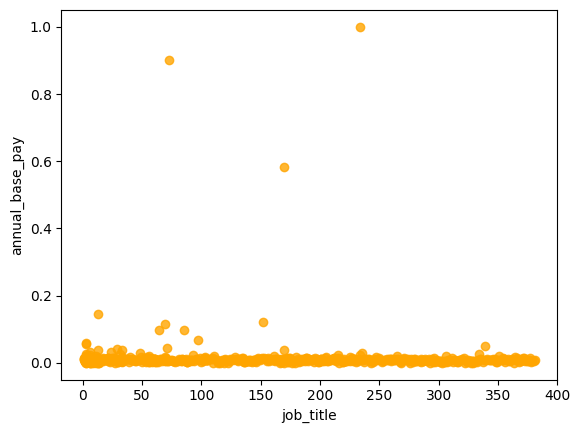

In [387]:
X = cleaned_data.loc[:, ["job_title"]]

sns.regplot(x=X, y=Y, data=data, logistic=True, ci=None, color='orange')

<Axes: xlabel='job_title_category', ylabel='annual_base_pay'>

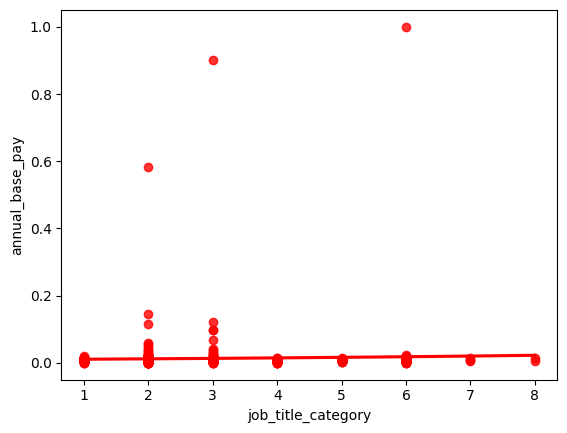

In [388]:
X = cleaned_data.loc[:, ["job_title_category"]]


sns.regplot(x=X, y=Y, data=data, logistic=True, ci=None, color='red')

<Axes: xlabel='location_country', ylabel='annual_base_pay'>

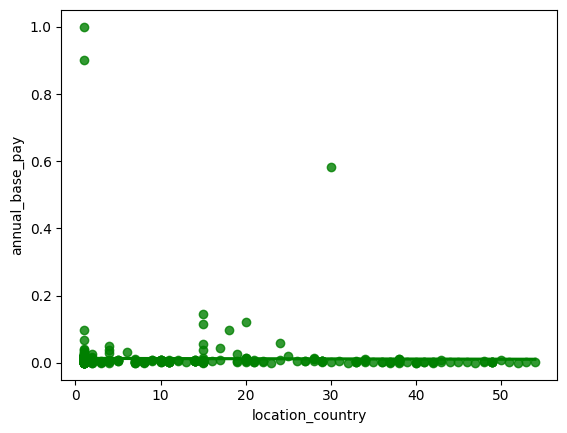

In [389]:
X = cleaned_data.loc[:, ["location_country"]]

sns.regplot(x=X, y=Y, data=data, logistic=True, ci=None, color='green')

<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

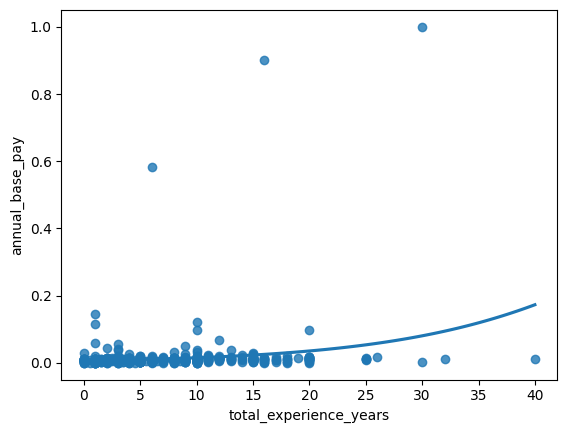

In [390]:
X = cleaned_data.loc[:, ["total_experience_years"]]

sns.regplot(x=X, y=Y, data=data, logistic=True, ci=None)

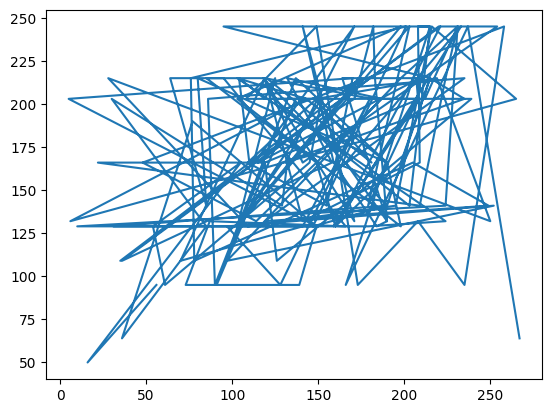

In [391]:



plt.plot(y_test, y_pred)

In [392]:
# print(y_test)
# print(y_pred)
# print(y_pred-y_test)

restuls = abs(y_pred-y_test)
print(restuls.max())
print(restuls.min())
print(sum(restuls)/len(restuls))

203
0
53.75471698113208
